In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
# upload your dataset

In [ ]:
!pip install opencv-python-headless
!pip install torch

In [ ]:
import os
import cv2
import numpy as np
import torch
from tqdm import tqdm

# 이미지가 저장된 루트 디렉토리 경로
root_dir = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train'

# GPU 장치를 사용하도록 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 이미지 경로들을 리스트로 저장
image_paths = []
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            # 이미지 파일 확장자 확인 및 '._'로 시작하지 않는 파일만 추가
            if file_name.endswith(('.png', '.jpg', '.JPEG')) and not file_name.startswith('._'):
                image_paths.append(os.path.join(folder_path, file_name))

# 평균과 분산을 계산할 변수를 초기화
n_images = len(image_paths)
mean = torch.zeros(1).to(device)
std = torch.zeros(1).to(device)

# 배치 크기 설정
batch_size = 64
n_batches = len(image_paths) // batch_size

# 모든 이미지를 동일한 크기로 변환 (예: 224x224)
resize_shape = (224, 224)

# 이미지를 배치 단위로 불러와 텐서로 변환한 후 평균과 분산 계산
for i in tqdm(range(n_batches + 1)):
    batch_paths = image_paths[i * batch_size:(i + 1) * batch_size]
    batch_images = []

    for image_path in batch_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 Grayscale로 읽음
        if image is None:  # 이미지가 None인 경우 스킵
            print(f"이미지를 불러올 수 없습니다: {image_path}")
            continue

        # 모든 이미지를 동일한 크기로 조정
        image = cv2.resize(image, resize_shape)

        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0).to(device) / 255.0  # 이미지를 0-1 범위로 정규화 및 텐서로 변환
        batch_images.append(image)

    if len(batch_images) == 0:
        continue

    # 배치를 텐서로 변환하고 평균과 표준 편차를 계산
    batch_images = torch.stack(batch_images)  # (batch_size, height, width)
    batch_mean = batch_images.mean([0, 2, 3])  # 배치의 평균 계산
    batch_std = batch_images.std([0, 2, 3])  # 배치의 표준 편차 계산

    mean += batch_mean.sum()  # 전체 평균 계산
    std += batch_std.sum()  # 전체 표준 편차 계산

mean /= n_images
std /= n_images

print(f'전체 이미지의 평균: {mean.item():.4f}')
print(f'전체 이미지의 분산: {std.item():.4f}')

100%|██████████| 235/235 [01:56<00:00,  2.01it/s]

전체 이미지의 평균: 0.0135
전체 이미지의 분산: 0.0039


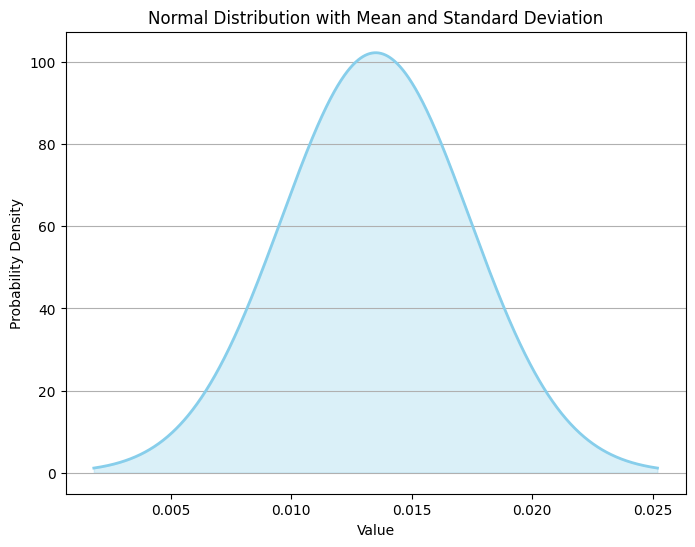

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 평균과 분산
mean = 0.0135
std = 0.0039

# 정규 분포를 따르는 데이터 생성
x = np.linspace(mean - 3*std, mean + 3*std, 1000)  # 평균을 중심으로 3표준편차 범위 내에서 x값 생성
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)  # 정규 분포 계산

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='skyblue', linewidth=2)
plt.fill_between(x, y, color='skyblue', alpha=0.3)
plt.title('Normal Distribution with Mean and Standard Deviation')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(axis='y')
plt.show()

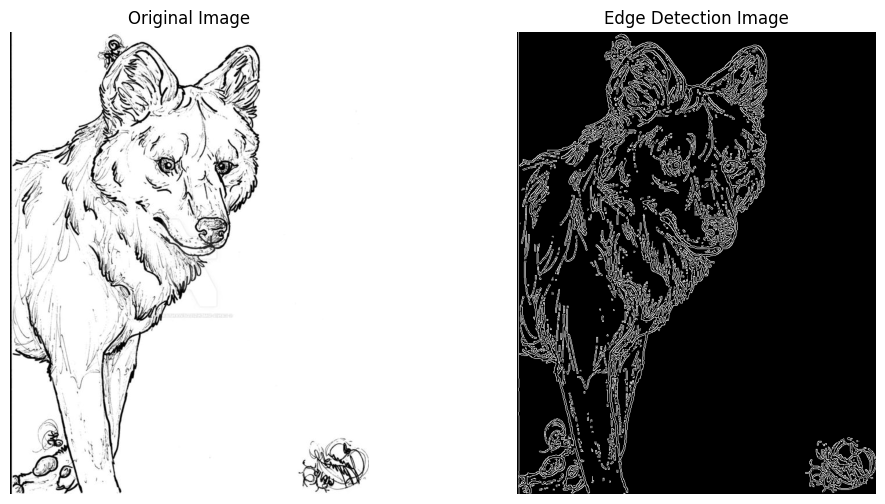

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 이미지 경로
img_path = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n02115913/sketch_48.JPEG'

# 이미지 로드 (Grayscale로 읽음)
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 로드되지 않은 경우 오류 처리
if image is None:
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {img_path}")

# Canny Edge Detection 적용
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# 원본 이미지와 테두리 강조된 이미지 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # 축 제거

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection Image')
plt.axis('off')  # 축 제거

plt.show()

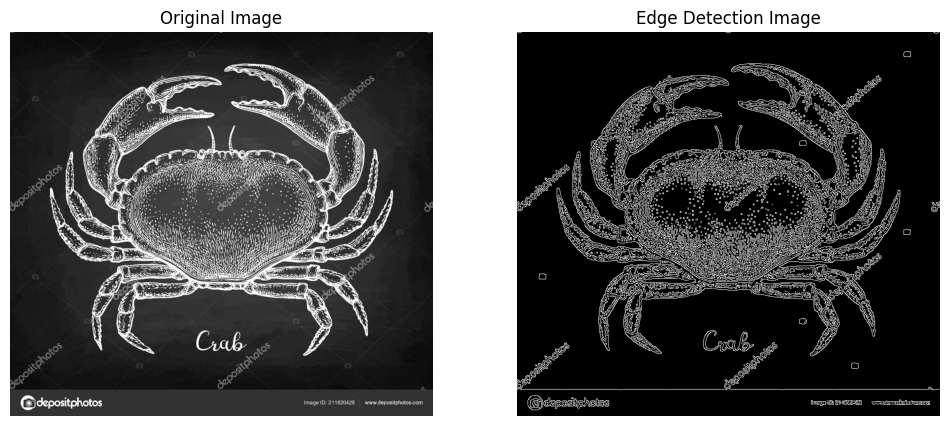

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 이미지 경로
img_path = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n01978287/sketch_14.JPEG'

# 이미지 로드 (Grayscale로 읽음)
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 로드되지 않은 경우 오류 처리
if image is None:
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {img_path}")

# Canny Edge Detection 적용
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# 원본 이미지와 테두리 강조된 이미지 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # 축 제거

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection Image')
plt.axis('off')  # 축 제거

plt.show()

/Users/jeongseungmin/Downloads/data/train/n01751748/sketch_12.JPEG

# 밝기 대비와 테두리 감지

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# 이미지가 저장된 디렉토리 경로
img_dir = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n02115913'

# 디렉토리 내 이미지 파일 리스트 생성 (._로 시작하지 않는 파일만)
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.JPEG')) and not f.startswith('._')][:60]

# 이미지 경로 리스트 생성
image_paths = [os.path.join(img_dir, f) for f in image_files]

# 이미지 처리 및 시각화
plt.figure(figsize=(18, 6 * len(image_paths)))

for i, img_path in enumerate(image_paths):
    # 이미지 로드
    image_bgr = cv2.imread(img_path)

    # 이미지가 로드되지 않은 경우 오류 처리
    if image_bgr is None:
        print(f"이미지를 찾을 수 없습니다: {img_path}")
        continue

    # OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # 그레이스케일로 변환
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

    # Canny Edge Detection 적용
    edges = cv2.Canny(image_gray, threshold1=50, threshold2=150)

    # CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(image_gray)

    # 원본 이미지, CLAHE 적용 이미지, 테두리 강조 이미지 시각화
    plt.subplot(len(image_paths), 3, i * 3 + 1)
    plt.imshow(image_rgb)
    plt.title(f'Original Image {i+1} (RGB)')
    plt.axis('off')  # 축 제거

    plt.subplot(len(image_paths), 3, i * 3 + 2)
    plt.imshow(clahe_image, cmap='gray')
    plt.title(f'CLAHE Applied Image {i+1} (Grayscale)')
    plt.axis('off')  # 축 제거

    plt.subplot(len(image_paths), 3, i * 3 + 3)
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection Image {i+1} (Grayscale)')
    plt.axis('off')  # 축 제거

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 정규화 ( Nomalization + MSR 정규화  + BDP(Blur poooling) )

*   항목 추가
*   항목 추가



In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지가 저장된 디렉토리 경로
img_dir = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n02115913'

# 정규화에 사용할 평균과 분산 (ImageNet 기준)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# 디렉토리 내 이미지 파일 리스트 생성 (._로 시작하지 않는 파일만)
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.JPEG')) and not f.startswith('._')]

# 이미지 경로 리스트 생성
image_paths = [os.path.join(img_dir, f) for f in image_files]

# 전체 이미지 수에 따른 플롯 크기 조정
plt.figure(figsize=(12, 5 * len(image_paths)))

for i, img_path in enumerate(image_paths):
    # 이미지 로드 (컬러로 읽음)
    image = cv2.imread(img_path)

    # 이미지가 로드되지 않은 경우 오류 처리
    if image is None:
        print(f"이미지를 찾을 수 없습니다: {img_path}")
        continue

    # OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 이미지를 정규화하지 않은 상태로 시각화
    plt.subplot(len(image_paths), 5, i * 5 + 1)
    plt.imshow(image_rgb)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # 이미지를 정규화 (mean과 std 사용)
    image_rgb = image_rgb / 255.0  # 이미지를 0-1 범위로 정규화
    normalized_image = (image_rgb - mean) / std  # 채널별 정규화 적용
    normalized_image = np.clip(normalized_image, 0, 1)  # 0-1 사이로 클리핑

    # 정규화된 이미지 시각화
    plt.subplot(len(image_paths), 5, i * 5 + 2)
    plt.imshow(normalized_image)
    plt.title(f'Normalized Image {i+1}')
    plt.axis('off')

    # MSR-like 효과를 위한 테두리 강조 (예: Sobel 연산)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # X 방향 미분
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Y 방향 미분
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = np.clip(sobel_combined, 0, 255).astype(np.uint8)

    # MSR-like 전처리 결과 시각화
    plt.subplot(len(image_paths), 5, i * 5 + 3)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title(f'MSR-like Image {i+1}')
    plt.axis('off')

    # Normalization + MSR-like 효과 동시 적용
    normalized_gray_image = (gray_image / 255.0 - np.mean(mean)) / np.mean(std)  # Gray 이미지에 대해 정규화
    normalized_gray_image = np.clip(normalized_gray_image, 0, 1)

    # Normalization + MSR-like 적용 이미지 시각화
    plt.subplot(len(image_paths), 5, i * 5 + 4)
    plt.imshow(normalized_gray_image, cmap='gray')
    plt.title(f'Normalized + MSR-like {i+1}')
    plt.axis('off')

    # BPD-like 효과: 가우시안 블러링 후 다운샘플링
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # 가우시안 블러링
    downsampled_image = blurred_image[::2, ::2]  # 2x 다운샘플링
    plt.subplot(len(image_paths), 5, i * 5 + 5)
    plt.imshow(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))
    plt.title(f'BPD-like Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지가 저장된 디렉토리 경로
img_dir = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n02115913'

# 디렉토리 내 이미지 파일 리스트 생성 (._로 시작하지 않는 파일만)
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.JPEG')) and not f.startswith('._')]

# 이미지 경로 리스트 생성
image_paths = [os.path.join(img_dir, f) for f in image_files]

# 전체 이미지 수에 따른 플롯 크기 조정
plt.figure(figsize=(12, 5 * len(image_paths)))

for i, img_path in enumerate(image_paths):
    # 이미지 로드 (컬러로 읽음)
    image = cv2.imread(img_path)

    # 이미지가 로드되지 않은 경우 오류 처리
    if image is None:
        print(f"이미지를 찾을 수 없습니다: {img_path}")
        continue

    # OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 원본 이미지 시각화
    plt.subplot(len(image_paths), 2, i * 2 + 1)
    plt.imshow(image_rgb)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # 단순한 이미지 처리: 예를 들어, 가우시안 블러 적용
    transformed_image = cv2.GaussianBlur(image_rgb, (15, 15), 0)

    # 처리된 이미지 시각화
    plt.subplot(len(image_paths), 2, i * 2 + 2)
    plt.imshow(transformed_image)
    plt.title(f'Transformed Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 간단한 증강

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지가 저장된 디렉토리 경로
img_dir = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n02115913'

# 디렉토리 내 이미지 파일 리스트 생성 (._로 시작하지 않는 파일만)
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.JPEG')) and not f.startswith('._')]

# 이미지 경로 리스트 생성
image_paths = [os.path.join(img_dir, f) for f in image_files]

# 랜덤 증강 함수 정의
def random_augmentation(image):
    # 무작위로 증강 선택
    augmentations = [
        lambda x: cv2.flip(x, 1),  # 수평 플립
        lambda x: cv2.flip(x, 0),  # 수직 플립
        lambda x: cv2.rotate(x, cv2.ROTATE_90_CLOCKWISE),  # 시계 방향 90도 회전
        lambda x: cv2.rotate(x, cv2.ROTATE_90_COUNTERCLOCKWISE),  # 반시계 방향 90도 회전
        lambda x: cv2.rotate(x, cv2.ROTATE_180),  # 180도 회전
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),  # 가우시안 블러
        lambda x: cv2.convertScaleAbs(x, alpha=random.uniform(0.5, 1.5), beta=random.randint(-50, 50)),  # 밝기 및 명암 조절
    ]

    # 증강을 랜덤으로 선택하여 적용
    augmented_image = random.choice(augmentations)(image)

    return augmented_image

# 전체 이미지 수에 따른 플롯 크기 조정
plt.figure(figsize=(12, 4 * len(image_paths)))

for i, img_path in enumerate(image_paths):
    # 이미지 로드 (컬러로 읽음)
    image = cv2.imread(img_path)

    # 이미지가 로드되지 않은 경우 오류 처리
    if image is None:
        print(f"이미지를 찾을 수 없습니다: {img_path}")
        continue

    # OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 원본 이미지 시각화
    plt.subplot(len(image_paths), 2, i * 2 + 1)
    plt.imshow(image_rgb)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # 랜덤 증강 적용
    augmented_image = random_augmentation(image_rgb)

    # 증강된 이미지 시각화
    plt.subplot(len(image_paths), 2, i * 2 + 2)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지가 저장된 디렉토리 경로
img_dir = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n02115913'

# 정규화에 사용할 평균과 분산 (ImageNet 기준)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# 디렉토리 내 이미지 파일 리스트 생성 (._로 시작하지 않는 파일만)
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.JPEG')) and not f.startswith('._')]

# 이미지 경로 리스트 생성
image_paths = [os.path.join(img_dir, f) for f in image_files]

# 전체 이미지 수에 따른 플롯 크기 조정
plt.figure(figsize=(12, 5 * len(image_paths)))

for i, img_path in enumerate(image_paths):
    # 이미지 로드 (컬러로 읽음)
    image = cv2.imread(img_path)

    # 이미지가 로드되지 않은 경우 오류 처리
    if image is None:
        print(f"이미지를 찾을 수 없습니다: {img_path}")
        continue

    # OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 1. Preprocessing
    # 1) CLAHE 적용 (선명도 증가)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_clahe = clahe.apply(image_gray)

    # 2) Resolution 조정 (해상도 일관성)
    # 2-1] 해상도 업/다운 샘플링
    resolution_image = cv2.resize(image_rgb, (256, 256), interpolation=cv2.INTER_LINEAR)

    # 2-2] Padding 적용
    desired_size = 300
    delta_w = desired_size - resolution_image.shape[1]
    delta_h = desired_size - resolution_image.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    padded_image = cv2.copyMakeBorder(resolution_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # 2. Augmentation
    # 1) Sharpening filter (사실주의 스케치)
    kernel_sharpening = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(padded_image, -1, kernel_sharpening)

    # 2) Blur (추상화 스케치)
    blurred_image = cv2.GaussianBlur(padded_image, (15, 15), 0)

    # 3) Flip (좌우 반전)
    flipped_image = cv2.flip(padded_image, 1)

    # 4) Affine 변환
    rows, cols = padded_image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 15, 1)
    affine_image = cv2.warpAffine(padded_image, M, (cols, rows))

    # 5) Cropping (90% 크기로)
    crop_size = int(0.9 * min(rows, cols))
    start_row = (rows - crop_size) // 2
    start_col = (cols - crop_size) // 2
    cropped_image = padded_image[start_row:start_row + crop_size, start_col:start_col + crop_size]

    # 시각화를 위한 결과 표시
    plt.subplot(len(image_paths), 6, i * 6 + 1)
    plt.imshow(image_rgb)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    plt.subplot(len(image_paths), 6, i * 6 + 2)
    plt.imshow(image_clahe, cmap='gray')
    plt.title(f'CLAHE {i+1}')
    plt.axis('off')

    plt.subplot(len(image_paths), 6, i * 6 + 3)
    plt.imshow(sharpened_image)
    plt.title(f'Sharpened {i+1}')
    plt.axis('off')

    plt.subplot(len(image_paths), 6, i * 6 + 4)
    plt.imshow(blurred_image)
    plt.title(f'Blurred {i+1}')
    plt.axis('off')

    plt.subplot(len(image_paths), 6, i * 6 + 5)
    plt.imshow(flipped_image)
    plt.title(f'Flipped {i+1}')
    plt.axis('off')

    plt.subplot(len(image_paths), 6, i * 6 + 6)
    plt.imshow(affine_image)
    plt.title(f'Affine {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지가 저장된 디렉토리 경로
img_dir = '/content/gdrive/MyDrive/CV대회1_데이터셋/data/train/n02115913'

# 정규화에 사용할 평균과 분산 (ImageNet 기준)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# 디렉토리 내 이미지 파일 리스트 생성 (._로 시작하지 않는 파일만)
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.JPEG')) and not f.startswith('._')]

# 이미지 경로 리스트 생성
image_paths = [os.path.join(img_dir, f) for f in image_files]

# 전체 이미지 수에 따른 플롯 크기 조정
plt.figure(figsize=(12, 5 * len(image_paths)))

for i, img_path in enumerate(image_paths):
    # 이미지 로드 (컬러로 읽음)
    image = cv2.imread(img_path)

    # 이미지가 로드되지 않은 경우 오류 처리
    if image is None:
        print(f"이미지를 찾을 수 없습니다: {img_path}")
        continue

    # OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 1. Normalization (이미지 정규화)
    image_rgb = image_rgb / 255.0  # 이미지를 0-1 범위로 정규화
    normalized_image = (image_rgb - mean) / std  # 채널별 정규화 적용
    normalized_image = np.clip(normalized_image, 0, 1)  # 0-1 사이로 클리핑

    # 정규화된 이미지 시각화
    plt.subplot(len(image_paths), 2, i * 2 + 1)
    plt.imshow(image_rgb)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    plt.subplot(len(image_paths), 2, i * 2 + 2)
    plt.imshow(normalized_image)
    plt.title(f'Normalized Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.